In [1]:
%load_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
from neuralprophet import NeuralProphet
import pandas as pd
import matplotlib.pyplot as plt

<IPython.core.display.Javascript object>

In [3]:
!curl "https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-andamento-nazionale/dpc-covid19-ita-andamento-nazionale.csv" -o "ts.csv"

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 32326  100 32326    0     0   186k      0 --:--:-- --:--:-- --:--:--  185k


<IPython.core.display.Javascript object>

In [4]:
df = pd.read_csv(
    "ts.csv",
)

<IPython.core.display.Javascript object>

In [5]:
df.dtypes

data                             object
stato                            object
ricoverati_con_sintomi            int64
terapia_intensiva                 int64
totale_ospedalizzati              int64
isolamento_domiciliare            int64
totale_positivi                   int64
variazione_totale_positivi        int64
nuovi_positivi                    int64
dimessi_guariti                   int64
deceduti                          int64
casi_da_sospetto_diagnostico    float64
casi_da_screening               float64
totale_casi                       int64
tamponi                           int64
casi_testati                    float64
note                             object
ingressi_terapia_intensiva      float64
note_test                       float64
note_casi                       float64
dtype: object

<IPython.core.display.Javascript object>

In [6]:
df.head()

,data,stato,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,dimessi_guariti,deceduti,casi_da_sospetto_diagnostico,casi_da_screening,totale_casi,tamponi,casi_testati,note,ingressi_terapia_intensiva,note_test,note_casi
0,2020-02-24T18:00:00,ITA,101,26,127,94,221,0,221,1,7,NaN,NaN,229,4324,NaN,NaN,NaN,NaN,NaN
1,2020-02-25T18:00:00,ITA,114,35,150,162,311,90,93,1,10,NaN,NaN,322,8623,NaN,NaN,NaN,NaN,NaN
2,2020-02-26T18:00:00,ITA,128,36,164,221,385,74,78,3,12,NaN,NaN,400,9587,NaN,NaN,NaN,NaN,NaN
3,2020-02-27T18:00:00,ITA,248,56,304,284,588,203,250,45,17,NaN,NaN,650,12014,NaN,NaN,NaN,NaN,NaN
4,2020-02-28T18:00:00,ITA,345,64,409,412,821,233,238,46,21,NaN,NaN,888,15695,NaN,NaN,NaN,NaN,NaN


<IPython.core.display.Javascript object>

In [7]:
daily_positive = df[["data", "nuovi_positivi"]]

<IPython.core.display.Javascript object>

In [8]:
daily_positive = daily_positive.rename(columns={"data": "ds", "nuovi_positivi": "y"})

<IPython.core.display.Javascript object>

In [9]:
daily_positive.head()

,ds,y
0,2020-02-24T18:00:00,221
1,2020-02-25T18:00:00,93
2,2020-02-26T18:00:00,78
3,2020-02-27T18:00:00,250
4,2020-02-28T18:00:00,238


<IPython.core.display.Javascript object>

In [10]:
LAYERS = 10
DAYS_PRED = 60

<IPython.core.display.Javascript object>

In [11]:
m = NeuralProphet(
    yearly_seasonality=True,
    daily_seasonality=False,
    weekly_seasonality=True,
    num_hidden_layers=LAYERS,
    # seasonality_reg=0.1,
)
metrics = m.fit(daily_positive, freq="D")

INFO: nprophet.config - set_auto_batch_epoch: Auto-set batch_size to 8
INFO: nprophet.config - set_auto_batch_epoch: Auto-set epochs to 108


INFO: nprophet - _lr_range_test: learning rate range test found optimal lr: 2.85E-01
Epoch[108/108]: 100%|██████████| 108/108 [00:05<00:00, 20.76it/s, SmoothL1Loss=0.00137, MAE=1.07e+3, RegLoss=0]


<IPython.core.display.Javascript object>

In [12]:
future = m.make_future_dataframe(daily_positive, periods=DAYS_PRED)
forecast_daily_pos = m.predict(future)

<IPython.core.display.Javascript object>

In [13]:
forecast_daily_pos

,ds,y,yhat1,residual1,trend,season_yearly,season_weekly
0,2020-12-14 17:00:00,None,12557.130859,NaN,16077.490234,-2041.451294,-1478.908203
1,2020-12-15 17:00:00,None,13210.167969,NaN,16148.941406,-2324.645020,-614.127869
2,2020-12-16 17:00:00,None,13517.626953,NaN,16220.392578,-2525.262451,-177.504364
3,2020-12-17 17:00:00,None,14168.328125,NaN,16291.845703,-2642.285889,518.768433
4,2020-12-18 17:00:00,None,14660.197266,NaN,16363.294922,-2675.382080,972.284302
5,2020-12-19 17:00:00,None,14597.960938,NaN,16434.746094,-2624.898682,788.112427
6,2020-12-20 17:00:00,None,14005.714844,NaN,16506.197266,-2491.858154,-8.624653
7,2020-12-21 17:00:00,None,12820.796875,NaN,16577.648438,-2277.942871,-1478.908203
8,2020-12-22 17:00:00,None,14049.476562,NaN,16649.099609,-1985.494507,-614.127869
9,2020-12-23 17:00:00,None,14925.576172,NaN,16720.548828,-1617.469116,-177.504364


<IPython.core.display.Javascript object>

In [14]:
forecast_daily_pos = forecast_daily_pos[["ds", "yhat1"]]

<IPython.core.display.Javascript object>

In [15]:
forecast_daily_pos = forecast_daily_pos.rename(
    columns={"ds": "date", "yhat1": "daily_positive"}
)

<IPython.core.display.Javascript object>

In [16]:
forecast_daily_pos["mean"] = forecast_daily_pos.rolling(5).mean()

<IPython.core.display.Javascript object>

In [17]:
forecast_daily_pos.to_csv(
    "output/forecast_{}days_{}layers.csv".format(DAYS_PRED, LAYERS)
)

<IPython.core.display.Javascript object>

In [18]:
daily_positive["mean"] = daily_positive.rolling(5).mean()

<IPython.core.display.Javascript object>

In [19]:
daily_positive.head()

,ds,y,mean
0,2020-02-24 18:00:00,221,NaN
1,2020-02-25 18:00:00,93,NaN
2,2020-02-26 18:00:00,78,NaN
3,2020-02-27 18:00:00,250,NaN
4,2020-02-28 18:00:00,238,176.0


<IPython.core.display.Javascript object>

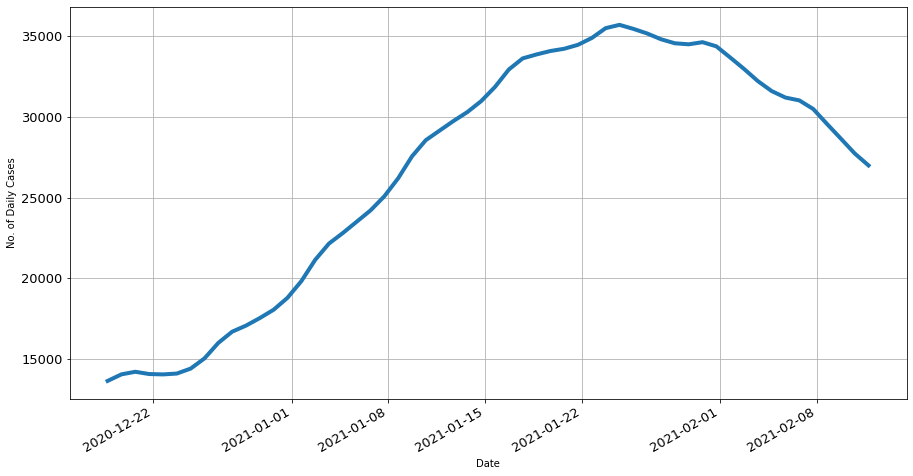

<IPython.core.display.Javascript object>

In [20]:
fig = forecast_daily_pos.plot(
    x="date",
    y="mean",
    kind="line",
    figsize=(15, 8),
    fontsize=13,
    legend=False,
)
# plt.plot("ds", "mean", data=daily_positive, marker="", color="red", linewidth=4)
fig.set_ylabel("No. of Daily Cases")
fig.set_xlabel("Date")
plt.grid()
for line in fig.get_lines():
    line.set_linewidth(4)
plt.show()